In [110]:
import sys, os
import time, pickle
sys.path.append("/Users/chilpert/Work/pyproteinsExt/src")
sys.path.append("/Users/chilpert/Work/pyproteins/src")
import pyproteinsExt.topology as topology
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
def save(data, tag=None):
    saveDir="/Volumes/arwen/mobi/group/NOX_CH/pickle_saved"
    timestr = time.strftime("%Y%m%d-%H%M%S")
    fTag = "NOX_annotation_" + tag + "_" if tag else "NOX_annotation_"
    fSerialDump = fTag + timestr + ".pickle"
    with open(saveDir + '/' + fSerialDump, 'wb') as f:
        pickle.dump(data, f)
    print('data structure saved to', saveDir + '/' + fSerialDump)

def load(fileName):
    saveDir="/Volumes/arwen/mobi/group/NOX_CH/pickle_saved"
    d = pickle.load( open(saveDir + "/" + fileName, "rb" ) )
    print("restore a annotated container of ", len(d), "elements")
    return d

In [112]:
data=load("NOX_annotation_withDomainEntries_20190613-171336.pickle")

restore a annotated container of  946 elements


### 1. Extract protein fragments

In [113]:
data.separate_seq_into_fragments()

In [6]:
sys.setrecursionlimit(10000)
#save(data,"withFragments")
save(data,"withFragments")
sys.setrecursionlimit(3000)

data structure saved to /Volumes/arwen/mobi/group/NOX_CH/pickle_saved/NOX_annotation_withFragments_20190614-110943.pickle


### 2. Size distributions

In [114]:
import seaborn as sns
from matplotlib import pyplot as plt

#### N-ter unannotated fragments

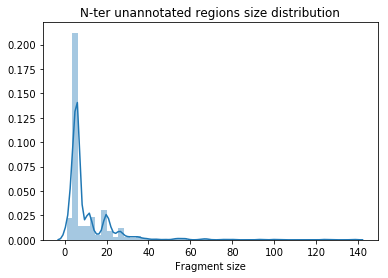

In [115]:
list_size=[len(e.Nter_UR_fragment["seq"]) for e in data]
list_size.sort()
plot=sns.distplot(list_size,axlabel="Fragment size").set_title("N-ter unannotated regions size distribution")
plot.figure.savefig("/Users/chilpert/Work/NOX_visu_new/Nter_UR_size.pdf")

#### C-ter unannotated fragments

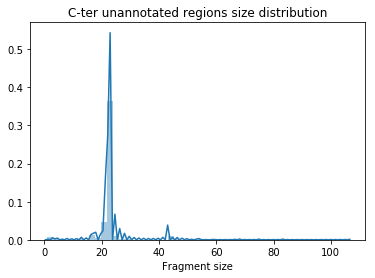

In [116]:
list_size=[len(e.Cter_UR_fragment["seq"]) for e in data]
plot=sns.distplot(list_size,axlabel="Fragment size").set_title("C-ter unannotated regions size distribution")
plot.figure.savefig("/Users/chilpert/Work/NOX_visu_new/Cter_UR_size.pdf")

#### FAD_binding fragments

In [117]:
list_size=[len(f["seq"]) for e in data for f in e.annotated_domains_fragments if f["name"]=="fad_binding_prokaryotes"]

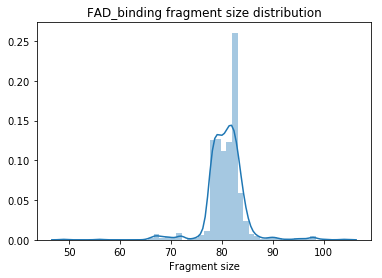

In [118]:
plot=sns.distplot(list_size,axlabel="Fragment size").set_title("FAD_binding fragment size distribution")
plot.figure.savefig("/Users/chilpert/Work/NOX_visu_new/FAD_binding_size.pdf")

#### NAD_binding fragments

In [119]:
list_size=[len(f["seq"]) for e in data for f in e.annotated_domains_fragments if f["name"]=="nad_binding_prokaryotes"]

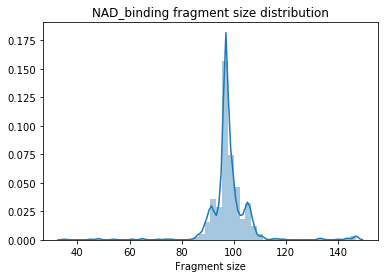

In [120]:
plot=sns.distplot(list_size,axlabel="Fragment size").set_title("NAD_binding fragment size distribution")
plot.figure.savefig("/Users/chilpert/Work/NOX_visu_new/NAD_binding_size.pdf")

#### Ferric reductase fragments

In [121]:
list_size=[len(f["seq"]) for e in data for f in e.annotated_domains_fragments if f["name"]=="ferric_reduct_prokaryotes"]

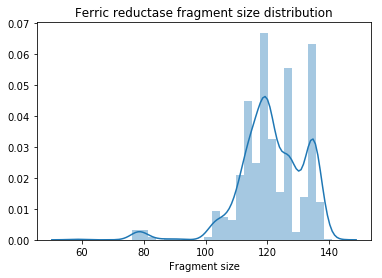

In [122]:
plot=sns.distplot(list_size,axlabel="Fragment size").set_title("Ferric reductase fragment size distribution")
plot.figure.savefig("/Users/chilpert/Work/NOX_visu_new/Ferric_reduct_size.pdf")

#### Helix number

In [123]:
list_helix_number=[len(e.helix_fragments) for e in data]
dic_number_helix={}
for n in list_helix_number: 
    if n not in dic_number_helix:
        dic_number_helix[n]=1
    dic_number_helix[n]+=1   

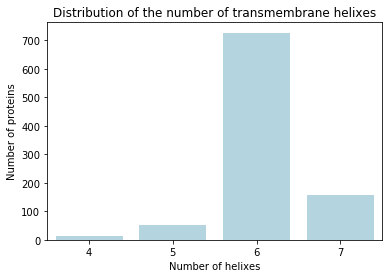

In [124]:
plot=sns.barplot(x=list(dic_number_helix.keys()),y=list(dic_number_helix.values()),color="lightblue").set(xlabel="Number of helixes",ylabel="Number of proteins",title="Distribution of the number of transmembrane helixes")
plt.savefig("/Users/chilpert/Work/NOX_visu_new/helix_number.pdf")

#### Helix size

In [125]:
list_size=[len(f["seq"]) for e in data for f in e.helix_fragments]

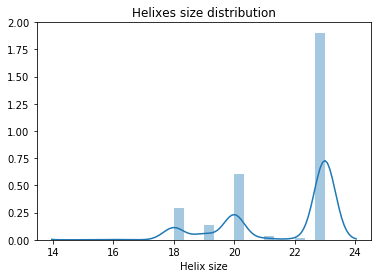

In [126]:
plot=sns.distplot(list_size).set(xlabel="Helix size",title="Helixes size distribution")
plt.savefig("/Users/chilpert/Work/NOX_visu_new/helix_size.pdf")

#### Loop size

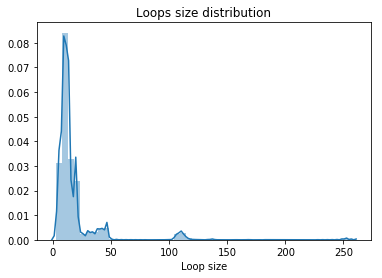

In [127]:
list_size=[len(f["seq"]) for e in data for f in e.loop_fragments]
plot=sns.distplot(list_size).set(xlabel="Loop size",title="Loops size distribution")
plt.savefig("/Users/chilpert/Work/NOX_visu_new/loop_size.pdf")

#### Intracellular loops size

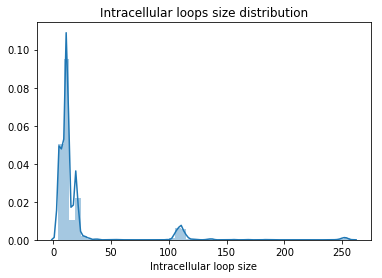

In [130]:
list_size_intra=[len(f["seq"]) for e in data for f in e.loop_fragments if "inside_loop" in f["name"]]
plot=sns.distplot(list_size_intra).set(xlabel="Intracellular loop size",title="Intracellular loops size distribution")
plt.savefig("/Users/chilpert/Work/NOX_visu_new/intra_loops_size.pdf")

#### Extracellular loops size

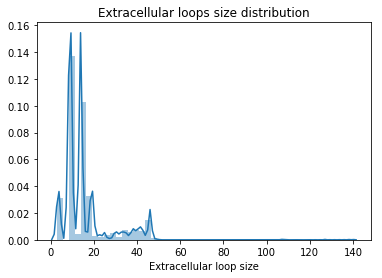

In [131]:
list_size_extra=[len(f["seq"]) for e in data for f in e.loop_fragments if "outside_loop" in f["name"]]
plot=sns.distplot(list_size_extra).set(xlabel="Extracellular loop size",title="Extracellular loops size distribution")
plt.savefig("/Users/chilpert/Work/NOX_visu_new/extra_loops_size.pdf")

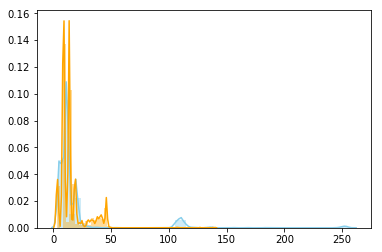

In [132]:
sns.distplot(list_size_intra,color="skyblue")
sns.distplot(list_size_extra,color="orange")
plt.savefig("/Users/chilpert/Work/NOX_visu_new/test.pdf")

### Check domains order

In [133]:
core_domains=["ferric_reduct_prokaryotes","nad_binding_prokaryotes","fad_binding_prokaryotes"]
check_length=set()
list_orders=[]
list_orders_all=[]
for e in data : 
    core_domains_fragments=[f for f in e.annotated_domains_fragments if f["name"] in core_domains]
    check_length.add(len(core_domains_fragments))
    order=[f["name"] for f in core_domains_fragments]
    order_all=[f["name"] for f in e.annotated_domains_fragments]
    if order not in list_orders: 
        list_orders.append(order)
    if order_all not in list_orders_all:
        list_orders_all.append(order_all)

In [136]:
print(list_orders)
print()
print(list_orders_all)

[['ferric_reduct_prokaryotes', 'fad_binding_prokaryotes', 'nad_binding_prokaryotes']]

[['ferric_reduct_prokaryotes', 'fad_binding_prokaryotes', 'nad_binding_prokaryotes'], ['EF-hand_8', 'EF-hand_7', 'ferric_reduct_prokaryotes', 'fad_binding_prokaryotes', 'nad_binding_prokaryotes'], ['EF-hand_7', 'ferric_reduct_prokaryotes', 'fad_binding_prokaryotes', 'nad_binding_prokaryotes'], ['EF-hand_1', 'EF-hand_7', 'ferric_reduct_prokaryotes', 'fad_binding_prokaryotes', 'nad_binding_prokaryotes']]


Core domains order is always the same : ferric reductase, fad_binding, nad_binding 
EF-handX are still before ferric reductase domain. 

### Check if ferric reductase is still in ferric reductase domain

In [137]:
starts_before=[]
ends_after=[]
for e in data : 
    ferric_position=[(f["start"],f["end"]) for f in e.annotated_domains_fragments if f["name"]=="ferric_reduct_prokaryotes"][0]
    transmembrane_position=(e.helix_fragments[0]["start"],e.helix_fragments[-1]["end"])
    len_ferric=ferric_position[1]-ferric_position[0]
    len_transmembrane=transmembrane_position[1]-transmembrane_position[0]
    if len_ferric > len_transmembrane: 
        print(e.prot,"Ferric reductase longer than transmembrane region")
    if ferric_position[0]<transmembrane_position[0]:
        starts_before.append({"prot":e.prot,"shift":transmembrane_position[0]-ferric_position[0]})
    if ferric_position[1]>transmembrane_position[1]:
        ends_after.append({"prot":e.prot,"shift":ferric_position[1]-transmembrane_position[1]})

In [138]:
print(starts_before)
print(len(starts_before))

[{'prot': 'tr|A0A1M2TZE2|A0A1M2TZE2_ECOLX', 'shift': 26}, {'prot': 'tr|A0A1M1NE58|A0A1M1NE58_ECOLX', 'shift': 26}, {'prot': 'tr|A0A2G4B6C3|A0A2G4B6C3_VIBSP', 'shift': 26}, {'prot': 'tr|A0A090P8E6|A0A090P8E6_9VIBR', 'shift': 20}, {'prot': 'tr|A0A2A4QPH1|A0A2A4QPH1_9RHOB', 'shift': 1}, {'prot': 'tr|A0A1Q6A6J6|A0A1Q6A6J6_9SPHI', 'shift': 19}, {'prot': 'tr|A0A376LV77|A0A376LV77_ECOLX', 'shift': 15}, {'prot': 'tr|A0A161R3H5|A0A161R3H5_ECOLX', 'shift': 26}, {'prot': 'tr|A0A0G0QUY4|A0A0G0QUY4_9BACT', 'shift': 1}, {'prot': 'tr|A0A1E2VNV3|A0A1E2VNV3_9ENTR', 'shift': 15}, {'prot': 'tr|Z2EV26|Z2EV26_VIBPH', 'shift': 6}, {'prot': 'tr|A0A349W7G9|A0A349W7G9_9BURK', 'shift': 24}, {'prot': 'tr|A0A231R527|A0A231R527_9BACL', 'shift': 6}]
13


In [139]:
print(ends_after)

[]


No proteins have ferric reductase domain longer than transmembrane domain.  
13 proteins have ferric reductase domain that starts earlier than transmembrane domain, with shift between 1 and 26.  
No proteins have ferric reductase domain that ends after transmembrane domain.  
So 933 proteins have ferric reductase domains contains in transmembrane domain.  

### Unannotated length

Looks at unannotated length, so number of residues not in annotated domains or transmembrane domains

In [140]:
non_annotated_lengths=[]
non_annotated_percent=[]
all_lengths=[]
for e in data: 
    annotated_residues=set()
    domains_residues=[[i for i in range(f["start"],f["end"]+1)] for f in e.annotated_domains_fragments]
    transmembrane_position=(e.helix_fragments[0]["start"],e.helix_fragments[-1]["end"])
    transmembrane_residues=[i for i in range(transmembrane_position[0],transmembrane_position[1]+1)]
    for residues in domains_residues: 
        annotated_residues.update(residues)
    annotated_residues.update(transmembrane_residues)
    non_annotated_lengths.append(len(e.fasta.seq)-len(annotated_residues))   
    non_annotated_percent.append((len(e.fasta.seq)-len(annotated_residues))/len(e.fasta.seq)*100) 
    all_lengths.append(len(e.fasta.seq))

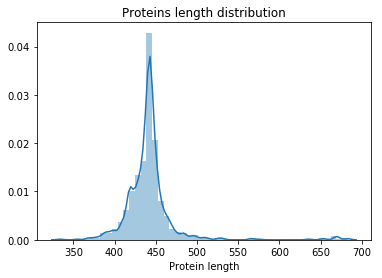

In [141]:
sns.distplot(all_lengths).set(xlabel="Protein length",title="Proteins length distribution")
plt.savefig("/Users/chilpert/Work/NOX_visu_new/proteins_length.pdf")

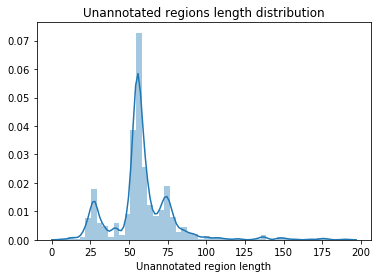

In [142]:
sns.distplot(non_annotated_lengths).set(xlabel="Unannotated region length",title="Unannotated regions length distribution")
plt.savefig("/Users/chilpert/Work/NOX_visu_new/unannotated_length.pdf")

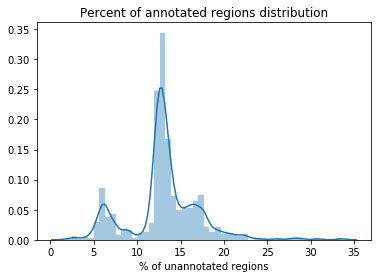

In [143]:
sns.distplot(non_annotated_percent).set(xlabel="% of unannotated regions",title="Percent of annotated regions distribution")
plt.savefig("/Users/chilpert/Work/NOX_visu_new/unannotated_percent.pdf")

### Serialize fragments to compute pairwise alignment

In [14]:
import pyproteins.sequence.peptide as pep
import time

In [5]:
data=load("NOX_annotation_withFragments_20190612-120537.pickle")

restore a annotated container of  946 elements


#### Lists NAD binding fragments

In [8]:
nad_fragments=[pep.Entry({'seq':f["seq"],"id":e.prot+"_NAD","desc":e.fasta.header+" NAD_binding"}) for e in data for f in e.annotated_domains_fragments if f["name"]=="nad_binding_prokaryotes"]

In [13]:
print(len(nad_fragments))

946


#### Lists all pairs comparison

In [11]:
list_pairs=[]
for i in range(len(nad_fragments)):
    for j in range(i+1,len(nad_fragments)):
        pair=(nad_fragments[i],nad_fragments[j])
        list_pairs.append(pair)

Process 1000 Needleman-Wunsch alignment lasts 1min20. We separate pairs in package of size 1000, so 447 packages   

In [29]:
list_pairs_split=[list_pairs[i:i+1000] for i in range(0,len(list_pairs),1000)]

#### Serialize packages

* Test with 20 proteins, and package of size 20 so 10 packages

In [30]:
nad_fragments=nad_fragments[:20]

In [31]:
list_pairs=[]
for i in range(len(nad_fragments)):
    for j in range(i+1,len(nad_fragments)):
        pair=(nad_fragments[i],nad_fragments[j])
        list_pairs.append(pair)

In [33]:
list_pairs_split=[list_pairs[i:i+20] for i in range(0,len(list_pairs),20)]

In [37]:
package_count=0
for list_pair in list_pairs_split: 
    package_count+=1
    pickle.dump(list_pair,open("/Volumes/arwen/mobi/group/NOX_CH/fragments_serialize/NAD_binding_package"+str(package_count)+".pickle",'wb'))